In [120]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [121]:
pd.set_option("display.max_columns",None)
lead_df=pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [122]:
lead_df.shape

(9240, 37)

In [123]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [124]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Preparation and Cleaning

In [126]:
category_cols=lead_df.select_dtypes(include=['object']).columns
for col in category_cols[1:]:
    print(col)
    print('-'*20)
    print(lead_df[col].value_counts(normalize=True,dropna=False))
    print()


Lead Origin
--------------------
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

Lead Source
--------------------
Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

Do Not Email
-----------

#### Observation
    -Different categories of the categorical variable is checked .Null values are also counted.
    -Some columns have a single category,so not relevant and need to be dropped.

In [127]:
#Replacing the 'Select' with NaN as the lead did not fill that column
lead_df=lead_df.replace('Select',np.nan)

In [128]:
#Checking for null values
round(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)*100,2)

#lead_df.drop(lead_df.loc[:,list(round(lead_df.isnull().sum()/lead_df.shape[0], 2)>0.70)].columns, 1)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [130]:
#Dropping columns that have null values greater than 70%
lead_df.drop(lead_df.loc[:,round(lead_df.isnull().sum()/len(lead_df),2)>.70].columns,axis=1,inplace=True)


In [131]:
round(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)*100,2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me 

In [132]:
#Many columns have single category or the other category is very very low.So dropping that rows.
cols_to_drop=['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
               'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
              'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque']
lead_df.drop(cols_to_drop,axis=1,inplace=True)

#Dropping ID_columns as it adds no point to the model building
lead_df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

#last_activity and last_notable_activity are highly correlated. One of them should be dropped to avoid multi-collinearity.
lead_df.drop(['Last Activity'],axis=1,inplace=True)

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Country                                 6779 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Tags                                    5887 non-null   obje

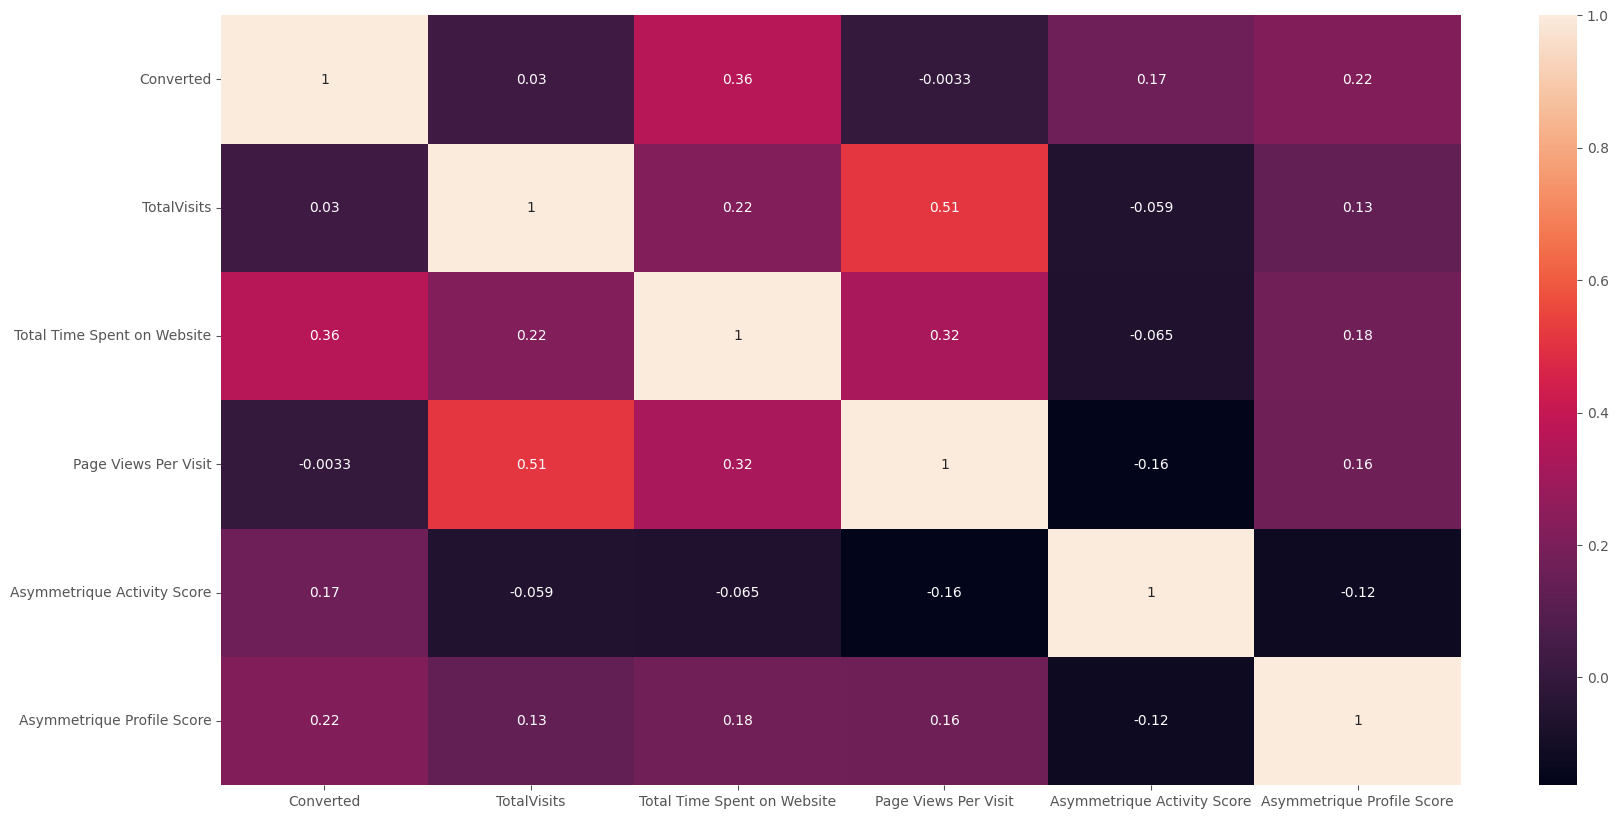

In [133]:
#Checking the colinearity between the numerical variables
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

#### Observation
The highest colinearity coefficient is .51 and this will be taken care while building the model

##### Imputing missing values

In [134]:
lead_df['Lead Quality'].value_counts(normalize=True,dropna=False)

NaN                  0.515909
Might be             0.168831
Not Sure             0.118182
High in Relevance    0.068939
Worst                0.065043
Low in Relevance     0.063095
Name: Lead Quality, dtype: float64

In [135]:
#We can impute the missing values NaN with 'Not Sure' 
lead_df['Lead Quality'].fillna('Not Sure',inplace=True)
lead_df['Lead Quality'].value_counts(dropna=False)

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [136]:
#As columns 'Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'
#has more than 45% null values ,we are dropping that columns
lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1,inplace=True)

In [137]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Country                                 6779 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Tags                                    5887 non-null   obje

In [139]:
#Again checking the null percentage
round(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)*100,2)

City                                      39.71
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
Country                                   26.63
TotalVisits                                1.48
Page Views Per Visit                       1.48
Lead Source                                0.39
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Lead Quality                               0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [140]:
lead_df['City'].value_counts(normalize=True,dropna=False)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [141]:
#Dropping columns 'City','Tags' as it has missing values >35% and looks less significant
lead_df.drop(['City','Tags'],axis=1,inplace=True)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Country                                 6779 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Lead Quality                            9240 non-null   obje

In [142]:
lead_df['Specialization'].value_counts(normalize=True,dropna=False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [143]:
#Null values in the 'Specialization' column can be replaced by 'UnKnown'
lead_df['Specialization']=lead_df['Specialization'].replace(np.nan,'UnKnown')

In [144]:
lead_df['What is your current occupation'].value_counts(normalize=True,dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [145]:
#Since larger share of the data(61%) is unemployed ,we can impute the null values with 'Unemployed'
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [146]:
lead_df['Country'].value_counts(normalize=True,dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

In [147]:
# More than 70% data is of "India" and hence it is safer to impute NULLS with this value
lead_df['Country'] = lead_df['Country'].replace(np.nan, 'India')

In [148]:
round(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)*100,2)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Lead Source                               0.39
Lead Origin                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Lead Quality                              0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [149]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
lead_df.dropna(inplace=True)

In [150]:
#Rechecking the missing percentage
round(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df)*100,2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Lead Quality                              0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [151]:


# Do not Email col. mapping yes and no with 1 and 0
lead_df['Do Not Email'] = lead_df['Do Not Email'].map({'Yes':1, 'No':0})
lead_df['A free copy of Mastering The Interview'] = lead_df['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

In [152]:
# Cleaning "Lead Source" column
df1 = lead_df["Lead Source"].value_counts()

# Values with frequency less than 30 are classified under "others"
lead_df['Lead Source'] = lead_df["Lead Source"].replace(df1[df1 < 30].index, "others")
lead_df["Lead Source"].value_counts()


Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
others                28
Name: Lead Source, dtype: int64

In [153]:
df1 = lead_df["Country"].value_counts()

# Values with frequency less than 30 are classified under "other Countries"
lead_df['Country'] = lead_df["Country"].replace(df1[df1 < 30].index, "other Countries")

df1 = lead_df["Last Notable Activity"].value_counts()

# Values with frequency less than 30 are classified under "other Countries"
lead_df['Last Notable Activity'] = lead_df["Last Notable Activity"].replace(df1[df1 < 30].index, "others")


In [154]:
#Renaming the column 'What is your current occupation' to 'Occupation'
lead_df.rename(columns = {'What is your current occupation':'Occupation'}, inplace = True)

In [155]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Country                                 9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   Occupation                              9074 non-null   object 
 10  Lead Quality                            9074 non-null   obje

### Exploratory Data Analysis

In [34]:
#Analysing target variable
lead_df["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

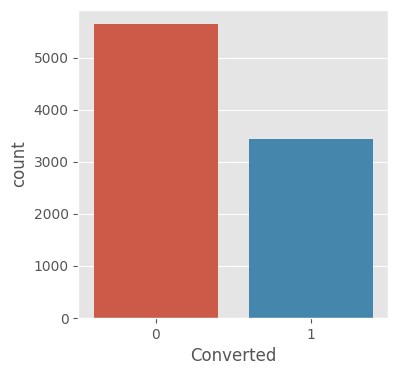

In [158]:
plt.figure(figsize=(4,4))
sns.countplot(x="Converted", data= lead_df)
plt.show()

There is not much data imbalance in the target variable analysis

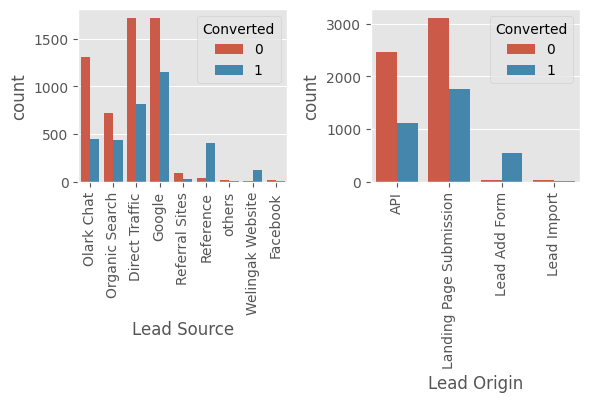

In [162]:
fig=plt.subplots(figsize=(6, 6))
plt.subplot(2,2,1)
sns.countplot(x="Lead Source", hue="Converted", data= lead_df)
plt.xticks(rotation='vertical')

plt.subplot(2,2,2)
sns.countplot(x="Lead Origin", hue="Converted", data= lead_df)
plt.xticks(rotation='vertical')
plt.tight_layout()




##### Observation
The main Lead Source is 'Google' as per the plot
In the case of lead origin , the count is higher for 'Landing Page Submission'.

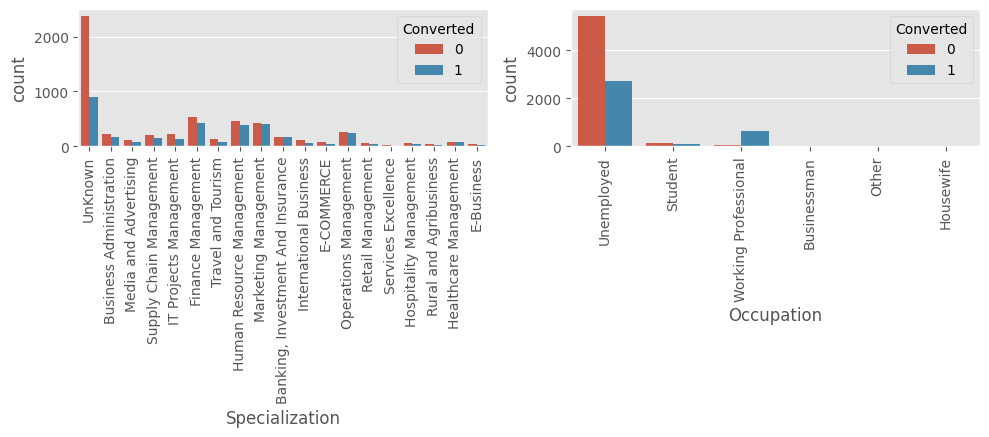

In [163]:
fig=plt.subplots(figsize=(10, 6))

for i, feature in enumerate(["Specialization", "Occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=lead_df)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

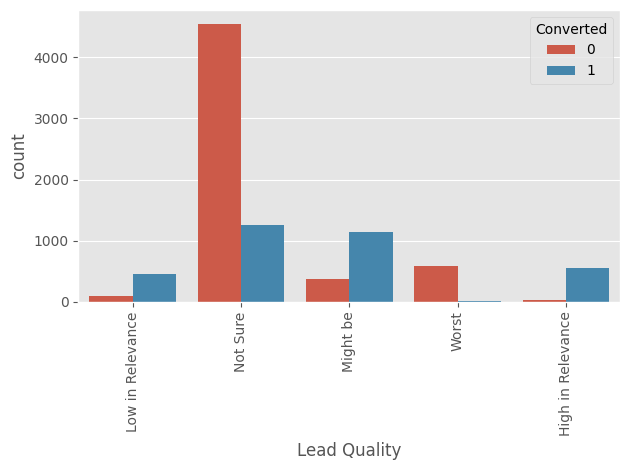

In [37]:
sns.countplot(x="Lead Quality", hue="Converted", data= lead_df)
plt.xticks(rotation='vertical')
plt.tight_layout()

#### Observation
    -Finance,HR,Marketing management specialization has higher conversion rate
    -Working Professionals has very high conversion rate.
    -In Lead Quality 'High in Relevance' and 'Low in Relevance' category has good conversion rate


### Outlier  Checking

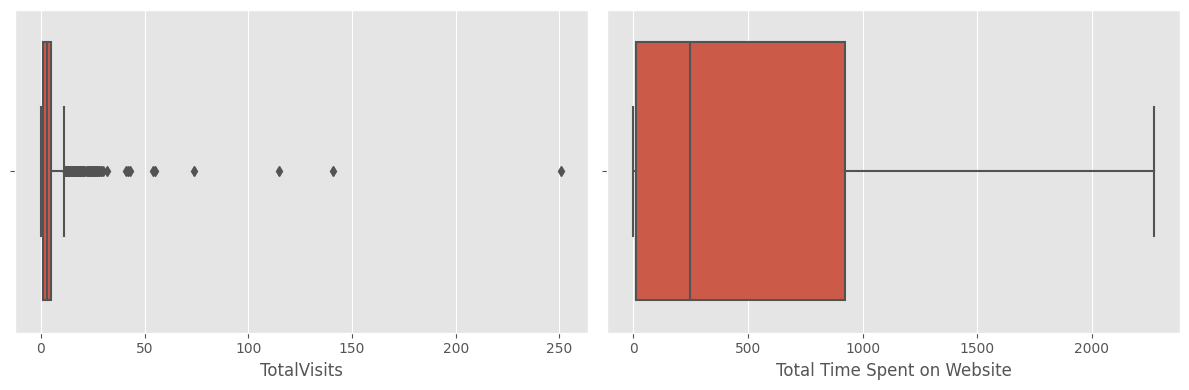

In [164]:
num_cols=["TotalVisits", "Total Time Spent on Website"]
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.boxplot(data=lead_df, x=num_cols[0])

plt.subplot(122)
sns.boxplot(data=lead_df, x=num_cols[1])
plt.tight_layout()
  

###### There are some outliers in the 'TotalVisits' column and we can cap this  to 95 percetile

In [165]:
df1 = lead_df["TotalVisits"].quantile(0.95)
lead_df["TotalVisits"][lead_df["TotalVisits"] >= df1] = df1

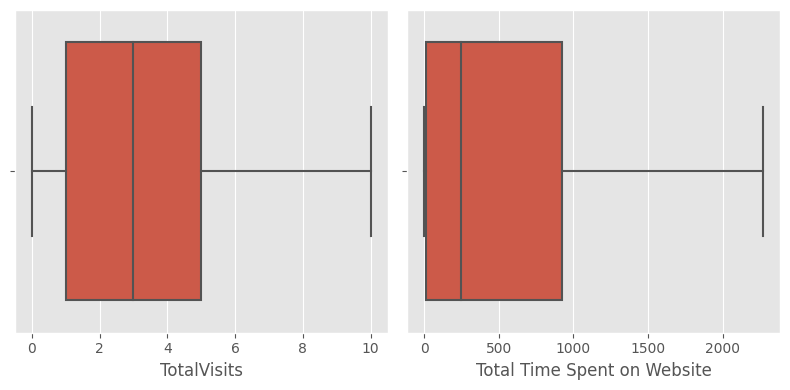

In [166]:
num_cols=["TotalVisits", "Total Time Spent on Website"]
plt.figure(figsize=(8, 4))
plt.subplot(121)
sns.boxplot(data=lead_df, x=num_cols[0])

plt.subplot(122)
sns.boxplot(data=lead_df, x=num_cols[1])
plt.tight_layout()

In [167]:
#Checking for outliers for the numerical columns again with different percentiles
num_df = lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.191867,482.887481,2.370151
std,2.780618,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,10.000000,1839.000000,9.000000
max,10.000000,2272.000000,55.000000


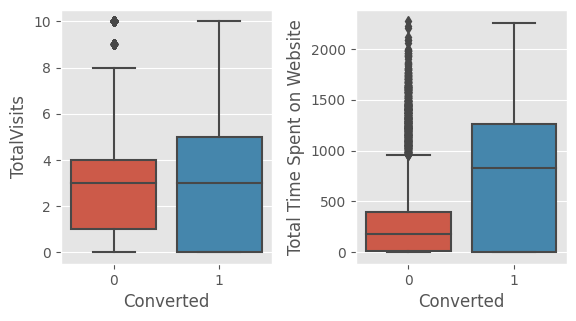

In [42]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = lead_df)
    plt.tight_layout()

###### Observation
    -The TotalVisits has same median for both converted and not converted.So cannot make much inferences
    -Total Time spent on Website has the larger median value compared to the non converted leads.So more the time spent,
     larger the chance to get converted


### Creating Dummy Variables 

In [168]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Country                                 9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   Occupation                              9074 non-null   object 
 10  Lead Quality                            9074 non-null   obje

In [169]:
#Creating dummy variables for the categorical columns
dummy1 = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source','Occupation',
                              'Country','Lead Quality','Last Notable Activity']], drop_first=True)
d = pd.get_dummies(lead_df['Specialization'], prefix='Specialization')
d1 = d.drop(['Specialization_UnKnown'], 1)
lead_df = lead_df.drop(['Lead Origin', 'Lead Source','Occupation',
                              'Country','Lead Quality','Last Notable Activity','Specialization'], axis=1)
lead_df = pd.concat([lead_df, dummy1,d1], axis=1)
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_others,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Country_United Arab Emirates,Country_United States,Country_other Countries,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [170]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 56 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9074 non-null   int64  
 1   Converted                                         9074 non-null   int64  
 2   TotalVisits                                       9074 non-null   float64
 3   Total Time Spent on Website                       9074 non-null   int64  
 4   Page Views Per Visit                              9074 non-null   float64
 5   A free copy of Mastering The Interview            9074 non-null   int64  
 6   Lead Origin_Landing Page Submission               9074 non-null   uint8  
 7   Lead Origin_Lead Add Form                         9074 non-null   uint8  
 8   Lead Origin_Lead Import                           9074 non-null   uint8  
 9   Lead Source_Faceboo

## Test- Train Split 

In [171]:
X=lead_df.drop('Converted',axis=1)
y=lead_df['Converted']
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_others,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Country_United Arab Emirates,Country_United States,Country_other Countries,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [172]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [173]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [174]:
#Feature Scaling the numerical columns with StandardScaler()
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_others,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Country_United Arab Emirates,Country_United States,Country_other Countries,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
3009,0,-0.432779,-0.160255,-0.179666,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.179666,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.179666,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7987,0,0.643547,2.017593,0.058552,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [175]:
#Checking the Conversion Rate

print("Conversion rate is ", (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100)

Conversion rate is  37.85541106458012


The conversion rate is almost 38%

## Looking at correlation

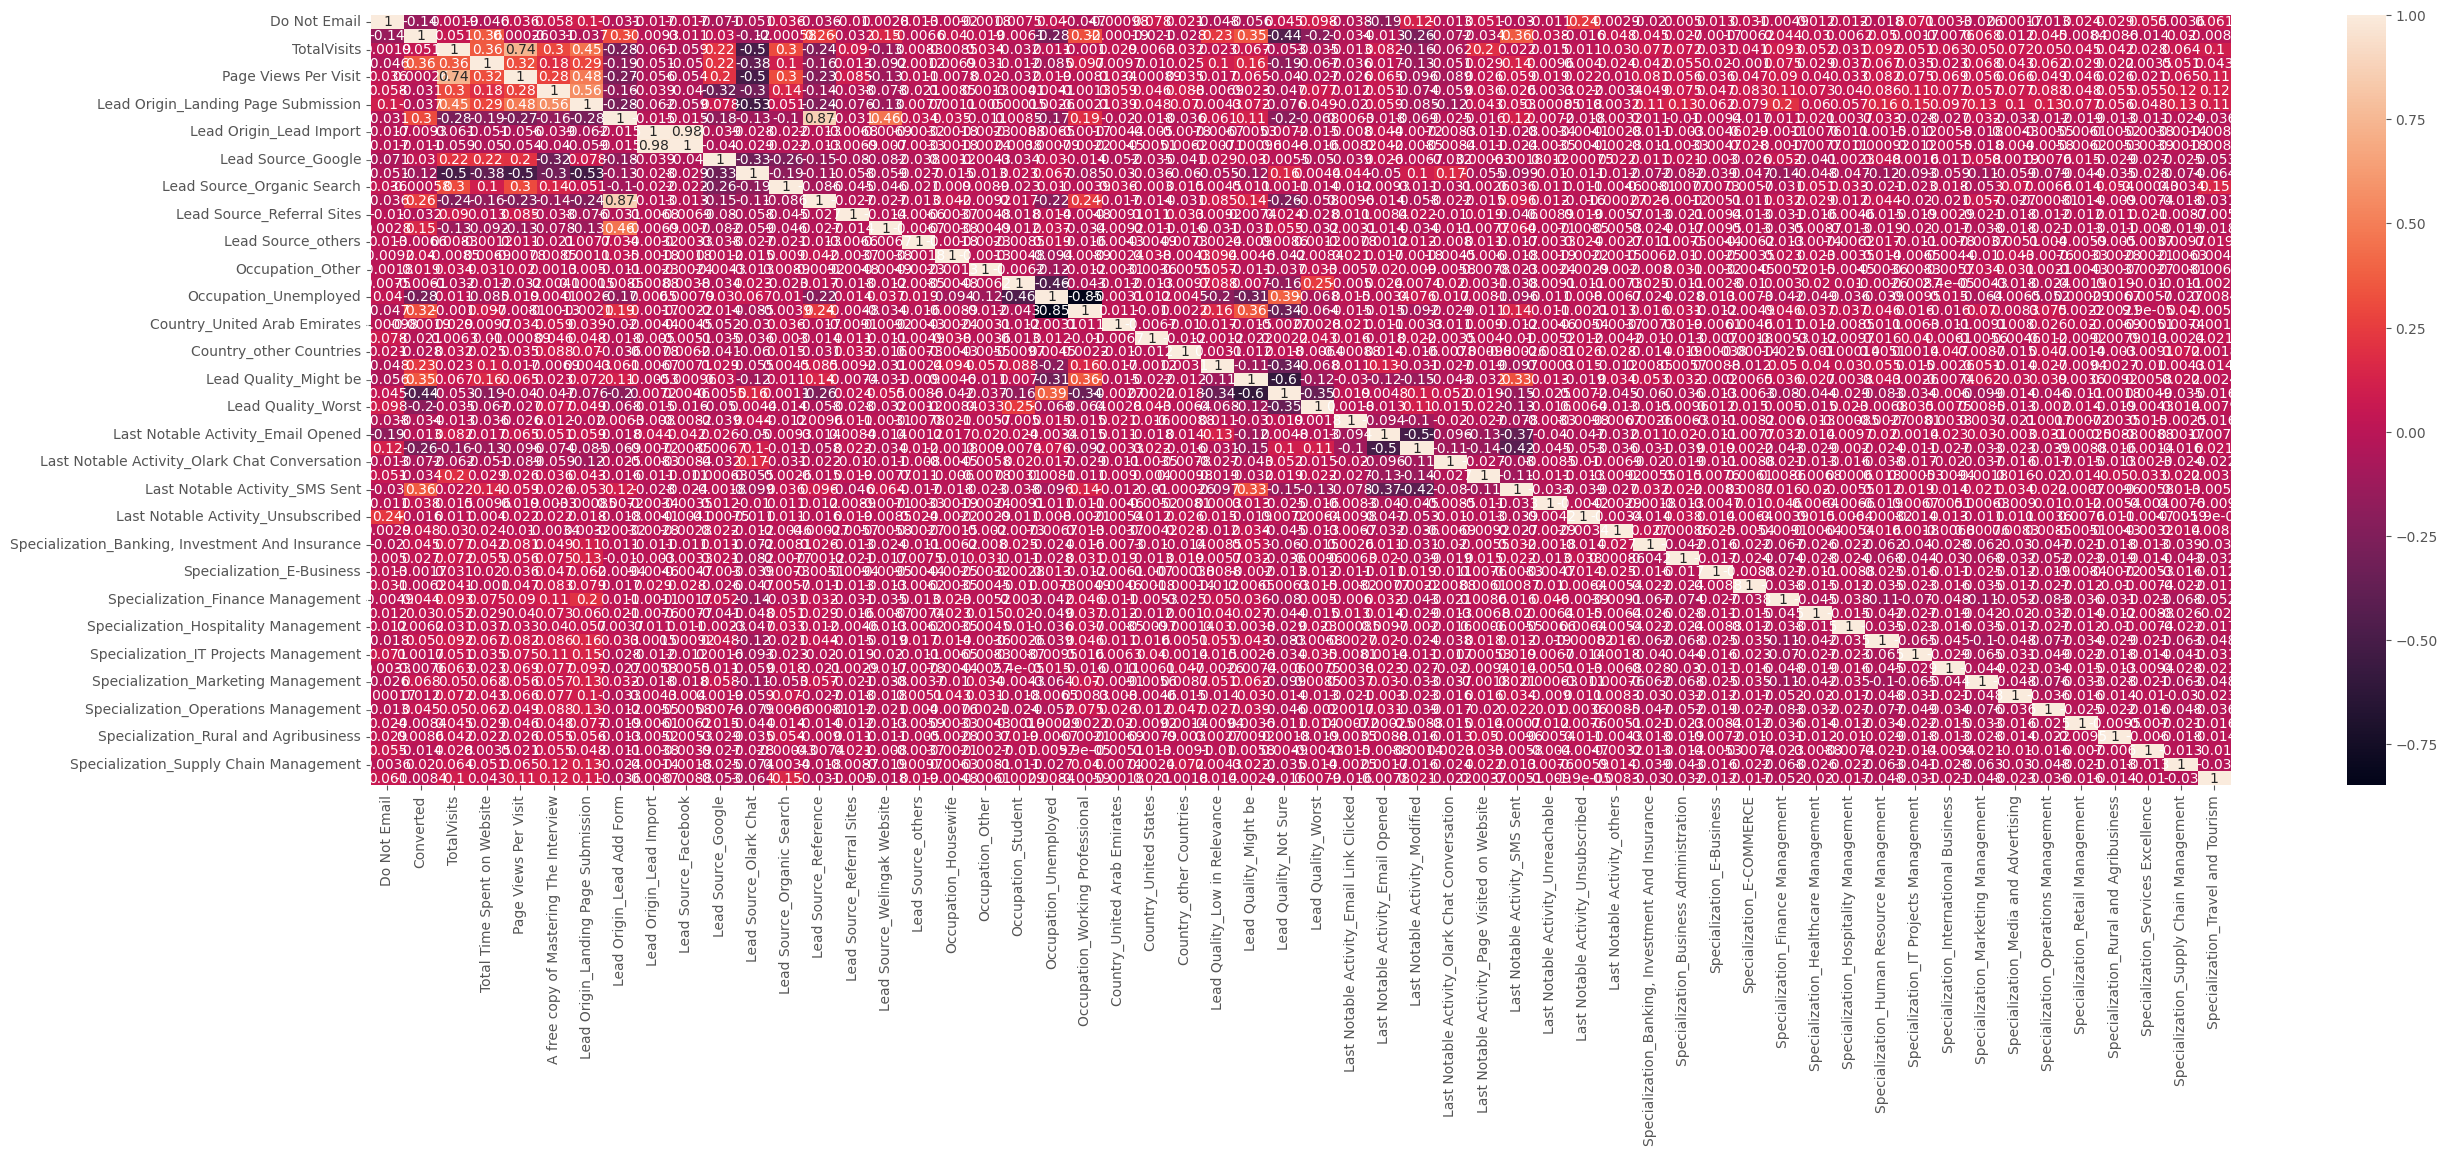

In [176]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,10))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

In [177]:
# Correlation between different numerical variables 
corr1 = lead_df.corr()

# Unstacking the correlation matrix and sorting it to find out top correlations
corr_unstacked = corr1.unstack().sort_values(kind="quicksort")
corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                 Lead Source_Facebook                   0.983684
Lead Origin_Lead Add Form               Lead Source_Reference                  0.866191
TotalVisits                             Page Views Per Visit                   0.737996
A free copy of Mastering The Interview  Lead Origin_Landing Page Submission    0.564863
Page Views Per Visit                    Lead Origin_Landing Page Submission    0.484119
Lead Origin_Lead Add Form               Lead Source_Welingak Website           0.459142
TotalVisits                             Lead Origin_Landing Page Submission    0.454350
Occupation_Unemployed                   Lead Quality_Not Sure                  0.390708
TotalVisits                             Total Time Spent on Website            0.361207
Converted                               Last Notable Activity_SMS Sent         0.360233
dtype: float64

In [178]:
# Dropping variables with high multi-collinearity
X_test = X_test.drop(['Lead Source_Facebook', 'Lead Origin_Lead Add Form'], axis=1)
X_train = X_train.drop(['Lead Source_Facebook', 'Lead Origin_Lead Add Form'], axis=1)

In [180]:
# Top 5 features correlated with target variable
lead_df.corr()['Converted'].abs().sort_values(ascending=False).head(6)[1:]

Lead Quality_Not Sure              0.443920
Last Notable Activity_SMS Sent     0.360233
Total Time Spent on Website        0.359261
Lead Quality_Might be              0.349936
Occupation_Working Professional    0.316246
Name: Converted, dtype: float64

## Model Building

In [181]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2106.4
Date:                Tue, 18 Apr 2023   Deviance:                       4212.9
Time:                        01:03:51   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4881
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                4.1084      1.371      2.997      0.003       1.422       6.795
Do Not Email                                        -1.3869      0.229     -6.047      0.000      -1.837      -0.937
TotalVisits                                          0.2526      0.064      3.946      0.000       0.127       0.378
Total Time Spent on Website                          1.1167      0.047     23.955      0.000       1.025       1.208
Page Views Per Visit                                -0.2400      0.067     -3.568      0.000      -0.372      -0.108
A free copy of Mastering The Interview              -0.0719      0.128     -0.562      0.574      -0.322       0.179
Lead Origin_Landing Page Submission                 -0.6371      0.158     -4.040      0.000      -0.946      -0.328
Lead Origin_Lead Import                              0.8917      0.595      1.500      0.134      -0.274       2.057
Lead Source_Google                                   0.2067      0.132      1.560      0.119      -0.053       0.466
Lead Source_Olark Chat                               1.2749      0.181      7.043      0.000       0.920       1.630
Lead Source_Organic Search                          -0.0432      0.153     -0.283      0.777      -0.342       0.256
Lead Source_Reference                                2.5427      0.306      8.300      0.000       1.942       3.143
Lead Source_Referral Sites                          -0.4592      0.401     -1.146      0.252      -1.245       0.326
Lead Source_Welingak Website                         6.4921      0.747      8.696      0.000       5.029       7.955
Lead Source_others                                   0.8556      0.603      1.420      0.156      -0.326       2.037
Occupation_Housewife                                19.6887    1.6e+04      0.001      0.999   -3.13e+04    3.14e+04
Occupation_Other                                    -0.7203      1.502     -0.480      0.631      -3.664       2.223
Occupation_Student                                  -1.0698      1.251     -0.855      0.392      -3.521       1.382
Occupation_Unemployed                               -1.6490      1.204     -1.370      0.171      -4.008       0.710
Occupation_Working Professional                      0.1662      1.223      0.136      0.892      -2.231       2.563
Country_United Arab Emirates                         0.6384      0.484      1.320      0.187      -0.309       1.586
Country_United States                                0.6320      0.518      1.220      0.222      -0.383       1.647
Country_other Countries                             -0.5049      0.315     -1.600      0.110      -1.123       0.113
Lead Quality_Low in Relevance            

##### Observation
    -This is the first model created. 
    -Some features that the model selected has high pvalue i.e.  less significant .So Using RFE ,feature elimination has to be done 

## Feature selection using RFE 

In [200]:
logreg = LogisticRegression()

In [201]:
rfe = RFE(logreg,n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [202]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False,  True,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [203]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_others', False, 8),
 ('Occupation_Housewife', False, 11),
 ('Occupation_Other', False, 31),
 ('Occupation_Student', False, 4),
 ('Occupation_Unemployed', False, 3),
 ('Occupation_Working Professional', True, 1),
 ('Country_United Arab Emirates', False, 13),
 ('Country_United States', False, 12),
 ('Country_other Countries', False, 9),
 ('Lead Quality_Low in Relevance', True, 1),
 ('Lead Quality_Might be', True, 1),
 ('Lead Quality_Not Sure', True, 1),
 (

In [204]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Occupation_Working Professional', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Last Notable Activity_others'],
      dtype='object')

In [205]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_others', 'Occupation_Housewife', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Country_United Arab Emirates', 'Country_United States',
       'Country_other Countries', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
     

### Assessing the model using statsmodel

In [206]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2173.8
Date:                Tue, 18 Apr 2023   Deviance:                       4347.5
Time:                        01:13:31   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4772
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.8740      0.239      7.842      0.000       1.406       2.342
Do Not Email                          -1.5467      0.205     -7.546      0.000      -1.948      -1.145
Total Time Spent on Website            1.1168      0.045     24.555      0.000       1.028       1.206
Lead Origin_Lead Import                1.2783      0.571      2.240      0.025       0.160       2.397
Lead Source_Olark Chat                 1.3483      0.113     11.943      0.000       1.127       1.570
Lead Source_Reference                  2.8465      0.259     10.978      0.000       2.338       3.355
Lead Source_Welingak Website           6.6030      0.732      9.026      0.000       5.169       8.037
Occupation_Working Professional        1.8118      0.218      8.315      0.000       1.385       2.239
Lead Quality_Low in Relevance         -1.3604      0.281     -4.835      0.000      -1.912      -0.809
Lead Quality_Might be                 -2.3138      0.255     -9.081      0.000      -2.813      -1.814
Lead Quality_Not Sure                 -4.0796      0.244    -16.693      0.000      -4.559      -3.601
Lead Quality_Worst                    -6.1986      0.440    -14.088      0.000      -7.061      -5.336
Last Notable Activity_SMS Sent         1.7119      0.088     19.414      0.000       1.539       1.885
Last Notable Activity_Unreachable      1.8154      0.552      3.286      0.001       0.733       2.898
Last Notable Activity_Unsubscribed     1.3494      0.640      2.110      0.035       0.096       2.603
Last Notable Activity_others           2.2780      0.797      2.856      0.004       0.715       3.841
======================================================================================================
"""

#### Observation
    -This is the second model with features selected using RFE.
    -Model seems pretty good as the pvalue is very low for most of the fetures
    -Multi colinearity also has to be checked using VIF

In [215]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.084361
1012    0.072860
9226    0.135908
4750    0.792754
7987    0.511922
1281    0.908543
2880    0.039552
4971    0.836521
7536    0.992858
1248    0.467404
dtype: float64

In [216]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08436127, 0.07285957, 0.13590848, 0.79275406, 0.51192211,
       0.90854288, 0.0395519 , 0.83652147, 0.99285799, 0.46740404])

#### Creating a dataframe with the true convertion status and the predicted probabilities

In [217]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Ld_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Ld_ID
0,0,0.084361,3009
1,0,0.072860,1012
2,0,0.135908,9226
3,1,0.792754,4750
4,1,0.511922,7987


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [218]:
#The cut-off value taken for predicting is 0.5 . Later we will find the optimum value using different metrics
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Ld_ID,predicted
0,0,0.084361,3009,0
1,0,0.072860,1012,0
2,0,0.135908,9226,0
3,1,0.792754,4750,1
4,1,0.511922,7987,1


In [219]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3564  341]
 [ 633 1813]]


In [220]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        3564      341
# Converted            633      1813

In [221]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8466383246732798


#### Observation
        -The Accuracy score of the above model is 84.66% which is pretty good one
        -The Cut-off taken here is 0.5
        -Further model evaluation with different metrics has to be done

### Checking VIFs 

In [222]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead Quality_Might be,1.60
11,Last Notable Activity_SMS Sent,1.54
9,Lead Quality_Not Sure,1.52
3,Lead Source_Olark Chat,1.49
6,Occupation_Working Professional,1.35
1,Total Time Spent on Website,1.33
4,Lead Source_Reference,1.23
0,Do Not Email,1.17
7,Lead Quality_Low in Relevance,1.11
13,Last Notable Activity_Unsubscribed,1.06


#####  Observation
    All variables have a good value of VIF which is < 2

## Measuring Model Performance

In [223]:
#Defining a function for evaluating the model using Accuracy,sensitivity(Recall),specificity,Precision
def model_performance(y_true, y_predicted):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_sc = TP / float(TP+FN)
    specificity_sc = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    print("Confusion Matrix :\n", confusion)
    print("Accuracy :", accuracy_sc)
    print("Sensitivity :", sensitivity_sc)
    print("Specificity :", specificity_sc)
    print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_sc, specificity_sc, precision_sc

In [224]:
model_performance(y_train_pred_final.Converted, y_train_pred_final.predicted)

Confusion Matrix :
 [[3564  341]
 [ 633 1813]]
Accuracy : 0.8466383246732798
Sensitivity : 0.741210139002453
Specificity : 0.9126760563380282
Precision : 0.8416898792943361


(0.8466383246732798, 0.741210139002453, 0.9126760563380282, 0.8416898792943361)

###### Observation
    -Different metrics are evaluated.
    -Sensitivity is 74% which is the lowest
    -Specificity is 91% which is highest
    -We want an optimum metrics for all,So finding the right cut-off plotting different metrics in a graph and finding the optimum value
    

## Plotting the ROC curve

In [225]:
#Function for drawing ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [226]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

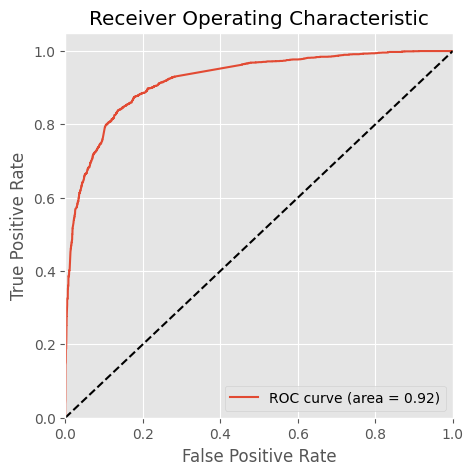

In [227]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

###### Observation
    -Since the ROC curve area is .92 i.e. (~1), it is a good model

## Finding Optimal Cutoff Point

In [228]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Ld_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.084361,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.072860,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.135908,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.792754,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.511922,7987,1,1,1,1,1,1,1,0,0,0,0


In [229]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.688396  0.968520  0.512932
0.2   0.2  0.813100  0.914963  0.749296
0.3   0.3  0.841757  0.859771  0.830474
0.4   0.4  0.853094  0.815209  0.876825
0.5   0.5  0.846638  0.741210  0.912676
0.6   0.6  0.843647  0.703189  0.931626
0.7   0.7  0.836561  0.652903  0.951601
0.8   0.8  0.817352  0.567048  0.974136
0.9   0.9  0.779247  0.448078  0.986684


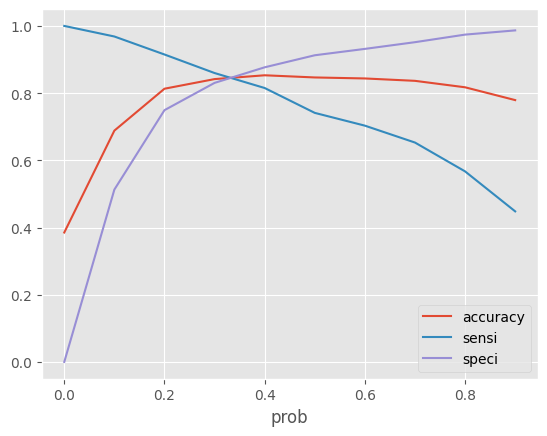

In [230]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [231]:
#Taking the cut-off value .37 based on the above graph,we are again evaluating the model
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Ld_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.084361,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.072860,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.135908,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.792754,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.511922,7987,1,1,1,1,1,1,1,0,0,0,0,1


In [232]:
model_performance(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

Confusion Matrix :
 [[3389  516]
 [ 413 2033]]
Accuracy : 0.8537238230199968
Sensitivity : 0.8311529026982829
Specificity : 0.8678617157490397
Precision : 0.7975676735974893


(0.8537238230199968,
 0.8311529026982829,
 0.8678617157490397,
 0.7975676735974893)

###### Observation
    -The model evaluation metrics seems to be good as all the metrics is 80% or above 

## Precision and Recall

In [233]:
#To calculate Precision and Recall and to find the optimum cut off,again the confusion metrics is made
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3564,  341],
       [ 633, 1813]], dtype=int64)

###### Precision
###### TP / TP + FP

In [234]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8416898792943361

###### Recall
###### TP / TP + FN

In [235]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.741210139002453

Using sklearn utilities for the same

In [236]:
from sklearn.metrics import precision_score, recall_score

In [237]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8416898792943361

In [238]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.741210139002453

In [ ]:
#Both the readings from sklearn and using the confusion metrics is same 

## Precision and recall tradeoff

In [239]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

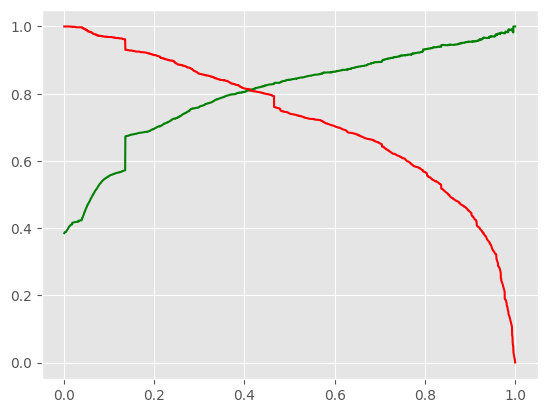

In [240]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###### Observation
In Sensitivity-Specificity-Accuracy plot 0.37 probability looks optimal. In Precision-Recall Curve 0.42 looks optimal.
We are taking 0.42 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [241]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,Ld_ID,Convert_predicted,Lead_Score
0,0,0.084361,3009,0,8
1,0,0.072860,1012,0,7
2,0,0.135908,9226,0,14
3,1,0.792754,4750,1,79
4,1,0.511922,7987,1,51
5,1,0.908543,1281,1,91
6,0,0.039552,2880,0,4
7,1,0.836521,4971,1,84
8,1,0.992858,7536,1,99
9,0,0.467404,1248,1,47


In [242]:
# Evaluating model performance on training data

model_performance(y_train_pred_final.Converted, y_train_pred_final.Convert_predicted)

Confusion Matrix :
 [[3453  452]
 [ 471 1975]]
Accuracy : 0.8546685561328925
Sensitivity : 0.8074407195421096
Specificity : 0.8842509603072983
Precision : 0.8137618459002884


(0.8546685561328925,
 0.8074407195421096,
 0.8842509603072983,
 0.8137618459002884)

## Making predictions on the test set 

In [243]:
#Numerical columns scaling for test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [244]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_others
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0,0,0,0
1490,0,1.887326,0,0,0,0,1,1,0,0,0,0,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0,0,0,0
4216,0,-0.888650,0,0,1,0,0,1,0,0,0,0,0,0,0
3830,0,-0.587751,0,0,0,0,0,0,0,1,0,0,0,0,0


In [245]:
X_test_sm = sm.add_constant(X_test)

In [246]:
y_test_pred = res.predict(X_test_sm)

In [247]:
y_test_pred[:10]

3271    0.053339
1490    0.988263
7936    0.045375
4216    0.914330
3830    0.054067
1800    0.815889
6507    0.227630
4821    0.141786
4223    0.995679
4714    0.135908
dtype: float64

In [248]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [249]:
# Let's see the head
y_pred_1.head()

,0
3271,0.053339
1490,0.988263
7936,0.045375
4216,0.914330
3830,0.054067


In [250]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [251]:
# Putting Ld_tID to index
y_test_df['Ld_ID'] = y_test_df.index

In [252]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [253]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [254]:
y_pred_final.head()

,Converted,Ld_ID,0
0,0,3271,0.053339
1,1,1490,0.988263
2,0,7936,0.045375
3,1,4216,0.914330
4,0,3830,0.054067


In [255]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [256]:

y_pred_final 

,Converted,Ld_ID,Converted_Prob
0,0,3271,0.053339
1,1,1490,0.988263
2,0,7936,0.045375
3,1,4216,0.914330
4,0,3830,0.054067
...,...,...,...
2718,0,850,0.182526
2719,0,2879,0.120141
2720,1,6501,0.953255
2721,0,7155,0.105013


In [257]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

In [258]:
y_pred_final.head()

,Converted,Ld_ID,Converted_Prob,final_predicted,Lead_Score
0,0,3271,0.053339,0,5
1,1,1490,0.988263,1,99
2,0,7936,0.045375,0,5
3,1,4216,0.914330,1,91
4,0,3830,0.054067,0,5


In [259]:
# Evaluating model performance on test data

model_performance(y_pred_final.Converted, y_pred_final.final_predicted)

Confusion Matrix :
 [[1528  206]
 [ 210  779]]
Accuracy : 0.847227322805729
Sensitivity : 0.7876643073811931
Specificity : 0.881199538638985
Precision : 0.7908629441624365


(0.847227322805729, 0.7876643073811931, 0.881199538638985, 0.7908629441624365)

###### Observation
    -The model evaluation of the train data
        Accuracy : 0.8546685561328925
        Sensitivity : 0.8074407195421096
        Specificity : 0.8842509603072983
        Precision : 0.8137618459002884
    -The model evaluation of the test data
        Accuracy : 0.847227322805729
        Sensitivity : 0.7876643073811931
        Specificity : 0.881199538638985
        Precision : 0.7908629441624365
    -The difference between the metrics of both train and test data is almost 2%.
    -It can be inferred that our model is predicting the conversion pretty well on test data.

## Lead Scoring

#### Lead scores for the train set 

In [118]:
y_train_pred_final.head()


,Converted,Converted_Prob,Ld_ID,Convert_predicted,Lead_Score
0,0,0.084361,3009,0,8
1,0,0.072860,1012,0,7
2,0,0.135908,9226,0,14
3,1,0.792754,4750,1,79
4,1,0.511922,7987,1,51


#### Lead scores for the test set 

In [119]:
y_pred_final.head()

,Converted,Ld_ID,Converted_Prob,final_predicted,Lead_Score
0,0,3271,0.053339,0,5
1,1,1490,0.988263,1,99
2,0,7936,0.045375,0,5
3,1,4216,0.914330,1,91
4,0,3830,0.054067,0,5
